# Chapter 2: Deep Learning with PyTorch




***
“The neural network is this kind of technology that is not an algorithm, it is a network that has weights on it, and you can adjust the weights so that it learns. You teach it through trials.”



-- Howard Rheingold 
***


Machine learning is one type of artificial intelligence. Instead of hard-coding in the rules, machine learning takes in input-output pairs and figures out the relation between the inputs (which we call features) and outputs (the labels). One field of machine learning, deep learning, has attracted much attention in recent years. Deep learning is one type of machine learning method that utilizes artificial neural networks. Almost all the recent advances in AI are powered by deep learning. We'll use deep learning to generate everything in this book: text, audio, images, figures, patterns. The name deep learning comes from the fact that the artificial neural networks have many layers of neurons in it. A typical large language model such as ChatGPT has hundreds, if not thousands, of layers in it. 

A neural network consists of an input layer, some hidden layers, and an output layer. In this chapter, we'll learn the basic structure of a neural network: neurons, weights, layers, activation functions, loss functions, optimizers and so on. You'll learn to create neural networks in this chapter to classify images of fashions into different categories such as bags, sneakers, or shirts. 

# 1. What Are Neural Networks?

This section discusses the basic structure of a neural network.

## 1.1. Elements of A Neural Network

A neural network consists of one input layer, one output layer, and a number of hidden layers. In general, each layer in a neural network has one or more neurons. Neural networks with two or more hidden layers are usually called deep neural networks. 

There are different types of layers in a neural network. The most common type of layer is the dense layer, in which each neuron is fully connected to the neurons in the next layer. 

The convolutional layers, in contrast, treats the input as a two-dimensional image and extract patterns from the input data. We'll discuss convolutional layers later in this book. 

## 1.2. Activation Functions
In artificial neural networks, activation functions transform inputs into outputs. As
the name suggests, the activation functions activate the neuron when the input reaches a certain threshold. Simply put, activation functions are on-off switches in artificial neural networks. These on-off switches play an important role in making artificial neural networks powerful. The activation functions allow a network to learn more complex patterns in the data. Without activation functions, neural networks can only learn linear relationships in the data.


Activation functions help us create a nonlinear relationship between the inputs and outputs. Without them, we can only approximate linear relations. No matter how many hidden layers we add to the neural network, we cannot achieve a nonlinear relationship. Without activation functions, the neural network cannot learn a nonlinear relationship: the linear transformation of a linear relationship is still linear.

ReLU is short for rectified linear unit activation function. It returns the original value if it’s positive, and 0 otherwise. It has the mathematical formula of 
$$ReLU(x)\
=\{\genfrac{}{}{0}{}{x\ if \ x>0}{0\ if \ x\leq 0}$$

It’s widely used in many neural networks, and you’ll see it in this book more often
than any other type of activation function.
In essence, the ReLU activation function activates the neuron when the value of x
reaches the threshold value of zero. When the value of x is below zero, the neuron is
switched off. This simply on-off switch is able to create a nonlinear relation between
inputs and outputs.

Another commonly used activation function is the sigmoid function. It’s widely used in many machine learning models. In particular, it’s a must-have in any binary classification problem.
The sigmoid function has the form
$$y=\frac {1} {1+e^{-x}} $$
The sigmoid function has an S-shaped curve. It has this nice property: for any value
of input x between −∞ and∞, the output value y is always between 0 and 1. Because
of this property, we use the sigmoid activation function to model the probability of
an outcome, which also falls between 0 and 1 (0 means there is no chance of the
outcome occurring, while 1 the outcome occurring with 100% certainty).

The third most-used activation function in this book is the softmax function. It’s a
must-have in any multi-category classification problem.
The softmax function has the form
$$y(x)=\frac {e^{x}} {\sum_{k=1}^{K}e^{x_k}}$$
where $x=[x_1,x_2,...,x_K]$ and $y=[y_1,y_2,...,y_K]$ are K-element lists. The i-th element of $y$ is 
$$y_i(x)=\frac {e^{x_i}} {\sum_{k=1}^{K}e^{x_k}}$$ 
The softmax function has a nice property: each element in the output vector $y$ is always between 0 and 1. Further, elements in the output vector $y$ sum up to 1. Because of this property, we use the softmax activation function to model the probability of a multiple outcome event. Therefore, the activation function in the output layer is always the softmax function when we model multi-class classification problems.  

Finally, we'll also use the tanh activation function when we train the actor-critic models later in this book. The Tanh activation function is similar to the sigmoid activation function in the sense that it also s-shaped. However, the output from the tanh activation function is in the range of -1 to 1 instead of from 0 to 1. The tanh activation function has the form
$$y=\frac {2} {1+e^{-2x}} -1$$ In machine learning, we usually normalize the image pixels to the range between -1 and 1 and the tanh activation function can accomplish that. 

## 1.3. Loss Functions
The loss function in ML is the objective function in the mathematical optimization process. Intuitively, the loss function measures the forecasting error of the machine learning algorithm. 
By minimizing the loss function, the machine learning model finds parameter values that
lead to the best predictions. 

The most commonly used loss function is mean squared error (MSE). MSE is defined as $$MSE= \frac{1}{N} \sum_{i=1} ^{N} (Y_n-\hat{Y}_n)^2$$

where $Y_n$ is the actual value of the target variable (i.e., the label) and $\hat{Y}_n$ is the predicted value of the target variable. 
To calculate MSE, we look at the forecasting error: the difference between the model’s predictions and the actual values. We then square the forecasting error for each observation, and average it across all observations. In short, it is the average squared forecasting error in each observation.


In binary classification problems, the preferred loss function is the binary cross-entropy function, which measures the average difference between the predicted probabilities and the actual labels (1 or 0). If a model makes a perfect prediction and assigns a 100% probability to all observations labeled 1 and a 0% probability to all observations labeled 0, the binary cross-entropy loss function will have a value of 0. 

Mathematically, the binary class-entropy loss function is defined as 
$$BinaryCrossEntropy= \sum_{n=1} ^{N} -[Y_n\times log(\hat{Y}_n) + (1-Y_n)\times log(1-\hat{Y}_n)]$$
where $\hat{Y}_n$ is the estimated probability of observation n being class 1, and $Y_n$ is the actual label of observation n (which is either 0 or 1).

The preferred loss function to use in multi-category classifications is the categorical-crossentropy loss function. It measures the average difference between the predicted distribution and the actual distribution. 

Mathematically, the categorical class-entropy loss function is defined as 
$$Categorical\ Cross\ Entropy= \sum_{n=1} ^{N}\sum_{k=1} ^{K} -y_{n,k}\times log(\hat{y}_{n,k})$$
where $\hat{y}_{n,k}$ is the estimated probability of observation n being class k, and $y_{n,k}$ is the actual label of observation n belonging to category k (which is either 0 or 1).

# 2.  PyTorch Fashion MNIST Dataset
In this section, you'll get used to the Fashion Modified National Institute of Standards and Technology (MNIST) dataset. Along the way, you'll learn how to use the *datasets* and *transforms* packages in the Torchvision library, as well as the *Dataloader* method in PyTorch packages that will benefit you for the rest of the book. You'll use these tools to preprocess data in many subsequent chapters. 

First, let's download the data and visualize the data. 

## 2.1. Download and Visualize the Data
You can download the Fashion MNIST data directly from Torchvision datasets. 

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

transform=T.Compose([
    T.ToTensor(),
    T.Normalize([0.5],[0.5])])

The *transforms* package in Torchvision can help create a series of transformations to preprocess images. The *ToTensor()* class converts image data (in either PIL image formats or NumPy arrays) into PyTorch tensors. In particular, the image data are integers ranging from 0 to 255 and the *ToTensor()* class converts them to float tensors with values in the range of 0.0 and 1.0. 

The *Normalize()* class normalizes tensor images with mean and standard deviation for n channels. The Fashion MNIST data are grayscale images of clothes items so there is only one color channel. Later in this book we'll deal with images of three differnet coloar channels (RGB). In the code cell above, *Normalize([0.5],[0.5])* means that we subtract 0.5 from the data and divide the difference by 0.5. The resulting image data ranges from -1 to 1. 

Next, we use the *datasets* package in Torchvision to download the dataset to a folder on your computer and perform the transformation, like so:

In [2]:
train_set=torchvision.datasets.FashionMNIST(root=r"C:\temp",
    train=True,download=True,transform=transform) 
test_set=torchvision.datasets.FashionMNIST(root=r"C:\temp",
    train=False,download=True,transform=transform)

If you print out the first sample in the PyTorch tensor *train_set*, you'll see the following:

In [3]:
print(train_set[0])

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -

The first sample consists of a tensor with 784 values and a label 9. The 784 numbers are the values in the 28 by 28 grayscale image, and label 9 means it's an ankle boot. 

There are ten different types of clothes items, and the text labels are as follows:

In [4]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

The labels in the dataset are numbers from 0 to 9. The list *text_labels* can convert the number labels to text labels. For example, if an item has a label of 0 in the dataset, the corresponding text label is "t-shirt". 

We can plot the data to visualize the clothes items in the dataset:

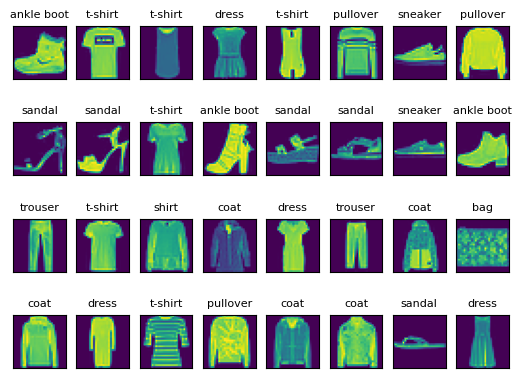

In [5]:
import matplotlib.pyplot as plt

for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow((train_set[i][0]/2+0.5).reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.title(text_labels[train_set[i][1]],fontsize=8)
plt.show()

The picture shows 32 clothes items such as coats, pullovers, sandals and so on. 

Next, we'll create batches of data for training. 

## 2.2. Create Batches 
Most deep learning algorithms are either a binary classification problem or a multi-category classification problem. For example in Generative Adversarial Networks (GANs), the discriminator essentially performs a binary classification task: to determine if the sample created by the generator is real or fake. In text generation models (either recurrent neural networks or Transformers), the model is trying to predict the next character or the next word, among many different choices. Therefore, it's important that we know how to create deep neural networks to perform binary and multi-category classification problems. 

Let's start with a binary classification example. We'll create a training set and a test set that contain only two types of clothes: t-shirts or ankle boots. The code cell below accomplishes that goal:

In [6]:
binary_train_set = [x for x in train_set if x[1] in [0,9]]
binary_test_set = [x for x in test_set if x[1] in [0,9]]

We only keep samples with labels 0 or 9. Let's check the sample size as follows:

In [7]:
print(len(train_set))
print(len(test_set))
print(len(binary_train_set))
print(len(binary_test_set))

60000
10000
12000
2000


There are 60,000 images in the training set, and 10,000 images in the test set. The binary training and test sets have 12,000 and 2,000 images, respectively.

Next, we create batches to prepare for training the deep neural network:

In [8]:
batch_size=64
train_loader=torch.utils.data.DataLoader(
    train_set,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(
    test_set,batch_size=batch_size,shuffle=True)
binary_train_loader=torch.utils.data.DataLoader(
    binary_train_set,batch_size=batch_size,shuffle=True)
binary_test_loader=torch.utils.data.DataLoader(
    binary_test_set,batch_size=batch_size,shuffle=True)

The DataLoader class in the PyTorch *utils* package helps create data iterators in batches. We set the batch size to 64. 

# 3. Binary Classification
We'll first create a binary classification model. We train the model by using the images of t-shirts and ankle boots. Once it's trained, we can see if the model can tell t-shirts from ankle boots. 

## 3.1. Create A Neural Network for Binary Classification
We first use PyTorch to create the following neural network:

In [9]:
device="cuda" if torch.cuda.is_available() else "cpu"
binary_model=nn.Sequential(
    nn.Linear(28*28,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,32),
    nn.ReLU(),
    nn.Linear(32,1),
    nn.Dropout(p=0.25),
    nn.Sigmoid()).to(device)

The input shape is 784 because we flatten the two-dimensinal image into a one dimensional vector with $28\times28=784$ values in it. There are three hidden layers in the network. Make sure the number of inputs matches the number of outputs in the previous layer. 

The output is a signle value, and we use the Sigmoid activation function to squeeze the number to the range [0, 1] so it can be interpreted as the probability that the object is an ankle boot. With complementary probability 1-p, the object is a t-shirt. 

We also set the learning rate as well as the optimizer and the loss function:

In [10]:
lr=0.001
optimizer=torch.optim.Adam(binary_model.parameters(),lr=lr)
loss_fn=nn.BCELoss()

## 3.2. Train the Binary Classifier
We'll train the neural network we just created in the last subsection. We first preprocess the data so that we can feed them into the models.

We'll convert both the game states and the moves into one-hot variables so that the deep neural network can process them. 

In [11]:
for i in range(100):
    for imgs,labels in binary_train_loader:
        tloss=0
        imgs=imgs.reshape(-1,28*28).to(device)
        labels=(labels/9).reshape(-1,1).to(device)
        preds=binary_model(imgs)
        loss=loss_fn(preds,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss+=loss
    print(f"at epoch {i}, loss is {tloss}")

at epoch 0, loss is 0.07235904037952423
at epoch 1, loss is 0.17329557240009308
at epoch 2, loss is 0.04364901781082153
at epoch 3, loss is 0.15243539214134216
at epoch 4, loss is 0.23914611339569092
at epoch 5, loss is 0.10836239159107208
at epoch 6, loss is 0.1516551673412323
at epoch 7, loss is 0.15162622928619385
at epoch 8, loss is 0.15162639319896698
at epoch 9, loss is 0.15162596106529236
at epoch 10, loss is 0.19494764506816864
at epoch 11, loss is 0.15162718296051025
at epoch 12, loss is 0.21660871803760529
at epoch 13, loss is 0.23826934397220612
at epoch 14, loss is 0.23826934397220612
at epoch 15, loss is 0.21660849452018738
at epoch 16, loss is 0.10830424726009369
at epoch 17, loss is 0.21660849452018738
at epoch 18, loss is 0.10830424726009369
at epoch 19, loss is 0.15162594616413116
at epoch 20, loss is 0.1732867956161499
at epoch 21, loss is 0.2815912961959839
at epoch 22, loss is 0.1732867956161499
at epoch 23, loss is 0.12996509671211243
at epoch 24, loss is 0.2599301

Note here that we divide the labels by 9: since we only keep t-shirts and ankle boots, and their labels are 0 and 9, respectively. If we divide the labels by 9, the labels for the two categories of items are 0 and 1, respectively. In binary classification, we label the targets as 0s and 1s. 

## 3.3. Calculate the Accuracy of the Binary Classifier

After 100 epochs of training, the loss is in the 0.1 to 0.2 range. However, it's hard for us to tell the performance of the predictions. We therefore calculate the accuracies of the predictions. 

The output is a number between 0 and 1. We'll use torch.where() to convert the prediction into 0s and 1s and compare them to the label. If the probability if less than 0.5, we label the prediction as 0. Otherwise we label the prediction as 1. 

Let's use one batch of data to illustrate. 

In [12]:
imgs,labels = next(iter(binary_test_loader))
imgs=imgs.reshape(-1,28*28).to(device)
labels=labels/9
preds=binary_model(imgs)
print(f"the labels are {labels}")
print(f"the predictions are {preds}")

the labels are tensor([1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 1., 0., 1.])
the predictions are tensor([[1.0000e+00],
        [0.0000e+00],
        [5.0000e-01],
        [5.0000e-01],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [5.0000e-01],
        [5.0000e-01],
        [5.0000e-01],
        [1.0000e+00],
        [5.0000e-01],
        [1.0000e+00],
        [1.5592e-21],
        [1.0000e+00],
        [8.2257e-35],
        [4.7033e-19],
        [5.0000e-01],
        [1.0000e+00],
        [5.0000e-01],
        [1.0000e+00],
        [2.4599e-30],
        [1.0000e+00],
        [5.0000e-01],
        [5.0000e-01],
        [1.0000e+00],
        [5.0000e-01],
        [1.0000e+00],
        [1.0000e+00],
        [5.0000e-01],
        [1.0000e

The predictions are float numbers between 0 and 1. We'll convert them into either 0 or 1, using 0.5 as the cutoff value. 

In [13]:
binary_preds=torch.where(preds>0.5,1,0).detach().cpu().numpy().reshape(-1,)
print(binary_preds)

[1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]


Now the predictions are either 0 (i.e., a t-shirt) or 1 (an ankle boot). We can now compare the prediction with the actual label and see how many times the model got it right. 

In [14]:
correct=(binary_preds==labels.cpu().numpy())
print(correct)

[ True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True False  True  True  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True]


There above results show that the model made 56 correct predictions and 8 wroing predictions. We can calculate the accuracy in the first batch as follows:

In [15]:
accuracy=correct.mean()
print(f"the accuracy of the predictions is {accuracy}")

the accuracy of the predictions is 0.875


The accuracy is 87.5%. 

Now now calculate the accuracy of the predictions in the whole test dataset as follows:

In [16]:
import numpy as np

results=[]
for imgs,labels in binary_test_loader:
    imgs=imgs.reshape(-1,28*28).to(device)
    labels=(labels/9).reshape(-1,1).to(device)
    preds=binary_model(imgs)
    pred10=torch.where(preds>0.5,1,0)
    correct=(pred10==labels)
    results.append(correct.detach().cpu().numpy().mean())
accuracy=np.array(results).mean()
print(f"the accuracy of the predictions is {accuracy}")    

the accuracy of the predictions is 0.857421875


## 3.4. Save and Load Models

We can save the trained PyTorch model by saving the trainable parameters in the neural network as follows:

In [17]:
sd=binary_model.state_dict()
torch.save(sd,"binary_model.pth")

You should be able to see the file *binary_model.pth* in the local folder. Later, you can load up the model weights as follows: 

In [18]:
trained_weights=torch.load("binary_model.pth",map_location=device)
binary_model.load_state_dict(trained_weights)

<All keys matched successfully>

# 4. Multi-Category Classification
We use a binary classification model when there are only two different types of models. In the example we just saw, there are only two types of clothes: t-shirts or ankle boots. 

However, the Fashion MNIST dataset contains 10 different categories of clothes items. We therefore need to create a multi-category classification model to classify them. Next, you'll learn how to create such a model and train it. You'll also learn how to make predictions using the trained model and assess the accuracy of the predictions.

## 4.1. A Multi-Category Classification Model
We use PyTorch to create the following neural network:

In [19]:
model=nn.Sequential(
    nn.Linear(28*28,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.Dropout(p=0.20),
    nn.Softmax(dim=1)).to(device)

We made a few changes compared to the binary classification model. First, we changed the number of neurons in the last hidden layer from 32 to 64. Second, the output now has ten values in it, representing the ten different types of clothes items in the dataset. Finally, we use the Softmax activation function instead of the Sigmoid activation function to squeeze the ten numbers to the range [0,1]. Further, the sum of the ten numbers add up to 1. The ten outputs can be interpreted as the probabilities that the model assigns to the ten type of clothes items. 

We'll use the same learning rate and optimizer as we did in binary classification. However, we now use the cross-entropy loss function to conduct our multi-category classifications. 

In [20]:
lr=0.001
optimizer=torch.optim.Adam(model.parameters(),lr=lr)
loss_fn=nn.CrossEntropyLoss()

## 3.2. Train the Multi-Category Classifier
We'll train the multi-category classifier we just created. 

In [21]:
for i in range(100):
    for imgs,labels in train_loader:
        tloss=0
        imgs=imgs.reshape(-1,28*28).to(device)
        labels=(labels).reshape(-1,).to(device)
        preds=model(imgs)
        loss=loss_fn(preds,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss+=loss
    print(f"at epoch {i}, loss is {tloss}")

at epoch 0, loss is 1.8682197332382202
at epoch 1, loss is 1.74806809425354
at epoch 2, loss is 1.600943684577942
at epoch 3, loss is 1.7557909488677979
at epoch 4, loss is 1.740663766860962
at epoch 5, loss is 1.8098807334899902
at epoch 6, loss is 1.6179778575897217
at epoch 7, loss is 1.6752846240997314
at epoch 8, loss is 1.5865466594696045
at epoch 9, loss is 1.8008360862731934
at epoch 10, loss is 1.6783758401870728
at epoch 11, loss is 1.59035062789917
at epoch 12, loss is 1.6547006368637085
at epoch 13, loss is 1.7703169584274292
at epoch 14, loss is 1.6401867866516113
at epoch 15, loss is 1.6955989599227905
at epoch 16, loss is 1.6618492603302002
at epoch 17, loss is 1.5481544733047485
at epoch 18, loss is 1.6552085876464844
at epoch 19, loss is 1.8203868865966797
at epoch 20, loss is 1.725070834159851
at epoch 21, loss is 1.721309781074524
at epoch 22, loss is 1.6328341960906982
at epoch 23, loss is 1.7710052728652954
at epoch 24, loss is 1.870588779449463
at epoch 25, loss i

Note here that we keep all ten types of clothes items, and their labels are from 0 to 9. 

## 3.3. Calculate the Accuracy of the Multi-Category Classifier

The output from the model prediction is a vector of ten numbers. We need to use *torch.argmax()* to see which clothes item is assigned the highest probability based on the prediction. We then compare the prediction with the actual label. 

Let's use one single prediction to illustrate. 

In [22]:
img,label = test_set[42]
img=img.reshape(-1,28*28).to(device)
pred=model(img)
print(f"the label is {label}")
print(f"the prediction is {pred}")

the label is 3
the prediction is tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


The 43rd item in the test dataset is a dress (with a label of 3). The prediction is a ten-value tensor. We'll use *torch.argmax()* to obtain the position of the highest probability, as follows: 

In [23]:
idex_pred=torch.argmax(pred,dim=1)
print(idex_pred)

tensor([3], device='cuda:0')


The above output shows that the position of the highest probability is 3 (that is, the fourth value in the tensor). We can compare it to the actual label, like so:

In [24]:
correct=(idex_pred.detach().cpu().numpy()==label)
print(correct)

[ True]


The model has made a correct prediction in this case. 

Now now can calculate the accuracy of the predictions in the whole test dataset as follows:

In [25]:
results=[]
for imgs,labels in test_loader:
    imgs=imgs.reshape(-1,28*28).to(device)
    labels=(labels).reshape(-1,).to(device)
    preds=model(imgs)
    pred10=torch.argmax(preds,dim=1)
    correct=(pred10==labels)
    results.append(correct.detach().cpu().numpy().mean())
accuracy=np.array(results).mean()
print(f"the accuracy of the predictions is {accuracy}")    

the accuracy of the predictions is 0.6937699044585988


The accuracy is about 70% in the out of sample test. Given that a random guess has an accuracy of about 10%, a 70% accuracy is fairly high. So the neural networks we have built are working well. 